In [1]:
using LinearAlgebra, Statistics

In [2]:
@show typeof(1)
@show typeof(1.0);

typeof(1) = Int64
typeof(1.0) = Float64


In [3]:
x = 1
typeof(x)

Int64

In [6]:
## Parametric types
##
@show typeof(1.0 +1im)
@show typeof(ones(2,2));

typeof(1.0 + 1im) = ComplexF64
typeof(ones(2, 2)) = Matrix{Float64}


In [9]:
## Tuple
x = (1, 2.0, "test")
@show typeof(x);

typeof(x) = Tuple{Int64, Float64, String}


In [13]:
## Named tuple
x = (a = 1, b = 2.0, c = "test")
@show typeof(x)
@show typeof(:a);

typeof(x) = @NamedTuple{a::Int64, b::Float64, c::String}
typeof(:a) = Symbol


In [15]:
## Variables types and values
##
x = 42
@show typeof(x)
x = 42.0
@show typeof(x);

typeof(x) = Int64
typeof(x) = Float64


In [19]:
## Type hierarchy
##
@show Float64 <: Real
@show Int64 <: Real
@show Complex{Float64} <: Real;
@show Array <: Real;

Float64 <: Real = true
Int64 <: Real = true
Complex{Float64} <: Real = false
Array <: Real = false


In [20]:
@show Real <: Number
@show Float64 <: Number
@show Int64 <: Number
@show Complex{Float64} <: Number;

Real <: Number = true
Float64 <: Number = true
Int64 <: Number = true
Complex{Float64} <: Number = true


In [21]:
Number <: Any

true

In [22]:
using Base: show_supertypes  # import the function from the `Base` package

show_supertypes(Int64)

Int64 <: Signed <: Integer <: Real <: Number <: Any

In [24]:
@show subtypes(Real)
@show subtypes(AbstractFloat);

subtypes(Real) = Any[AbstractFloat, AbstractIrrational, Integer, Rational]
subtypes(AbstractFloat) = Any[BigFloat, Float16, Float32, Float64]


In [26]:
## Deducing and declaring types
##
x1 = [1, 2, 3]
x2 = [1.0, 2.0, 3.0]
@show typeof(x1)
@show typeof(x2);

typeof(x1) = Vector{Int64}
typeof(x2) = Vector{Float64}


In [29]:
f(y) = 2y ## some function

x = [1, 2, 3]

z = f(x)

@show typeof(z);

typeof(z) = Vector{Int64}


In [31]:
## Good practises for functions and variable types
##
## Bad
##
x = [1.0, "test", 1]
typeof(x);

In [33]:
function f(x)
    if x > 0
        return 1.0
    else
        return 0
    end
end

@show f(1);
@show f(-1);

f(1) = 1.0
f(-1) = 0


In [35]:
function f(x,A)
    b = [5.0, 6.0]
    return A*x .+b
end
val = f([1.0,2.0], [1.0 2.0; 3.0 4.0])

2-element Vector{Float64}:
 10.0
 17.0

In [36]:
function f2(x::Vector{Float64}, A::Matrix{Float64})::Vector{Float64}
    # arguement and return types
    b::Vector{Float64} = [5.0, 6.0]
    return A * x .+b
end
val = f2([1.0; 2.0], [1.0 2.0; 3.0 4.0]) 

2-element Vector{Float64}:
 10.0
 17.0

In [38]:
@show f([0.1; 2.0], [1 2; 3 4])
@show f([0.1; 2.0], Diagonal([1.0, 2.0]));

f([0.1; 2.0], [1 2; 3 4]) = [9.1, 14.3]
f([0.1; 2.0], Diagonal([1.0, 2.0])) = [5.1, 10.0]


In [39]:
struct Foo
    a::Float64
    b::Int64
    c::Vector{Float64}
end

In [43]:
foo = Foo(2.0, 3, [1.0, 2.0, 3.0])
@show typeof(foo)
@show foo.a
@show foo.b
@show foo.c;

typeof(foo) = Foo
foo.a = 2.0
foo.b = 3
foo.c = [1.0, 2.0, 3.0]


In [44]:
struct Foo2
    a::Float64
    b::Integer
    c::Vector{Real}
end

In [49]:
f(x) = x.a + x.b + sum(x.c)
a = 2.0
b = 3
c = [1.0, 2.0, 3.0]
foo = Foo(a, b, c);
@show f(foo)
a = 2
b = 3
c = [1.0, 2.0, 3.0]'
# foo = Foo(a, b, c) # fails to comple


f(foo) = 11.0


1×3 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  2.0  3.0

In [51]:
##  Declaring parametric types
##
struct Foo3{T1, T2, T3}
    a::T1
    b::T2
    c::T3
end
a = 2
b = 3
c = [1.0, 2.0, 3.0]'

foo = Foo3(a, b, c)
@show typeof(foo)
@show f(foo);

typeof(foo) = Foo3{Int64, Int64, Adjoint{Float64, Vector{Float64}}}
f(foo) = 11.0


In [53]:
struct Foo4{T1<:Real, T2<:Real, T3<:AbstractVecOrMat{<:Real}}
    a::T1
    b::T2
    c::T3
end
foo = Foo4(a, b, c)
@show typeof(foo)
f(foo)

typeof(foo) = Foo4{Int64, Int64, Adjoint{Float64, Vector{Float64}}}


11.0

In [55]:
##  Keyword Argument Constructors
##
using Base: @kwdef

@kwdef struct Foo5
    a::Float64 = 2.0  # adds a default value
    b::Int64
    c::Vector{Float64}
end

foo = Foo5(a = 0.1, b = 2, c = [1.0, 2.0, 3.0])
foo2 = Foo5(c = [1.0, 2.0, 3.0], b = 2)

@show foo
@show foo2

function f(x)
    (; a, b, c) = x  # unpacks any struct or named tuple
    return a + b + sum(c)
end

f(foo)

foo = Foo5(0.1, 2, [1.0, 2.0, 3.0])
foo2 = Foo5(2.0, 2, [1.0, 2.0, 3.0])


8.1

In [81]:
##  Tips and tricks for writing generic functions
##
##  Do not declare types when declaring variables or functions unless necessary
##
##  Bad
##
x = [5.0, 6.0, 2.1]

function g(x::Array{Float64, 1})  # not generic
    y = zeros(length(x))  # not generic, hidden float!
    z = Diagonal(ones(length(x)))  # not generic, hidden float!
    q = ones(length(x))
    y .= z * x + q
    return y
end

g(x)

##  Good
##
function g2(x)  # or 'x::AbstractVector'
    y = similar(x)
    z = I
    q = ones(eltype(x), length(x))  # or 'fill(one(x), length(x))'
    y .= z * x + q
    return y
end

g2(x)


##  Preallocate related vectors wher possible and use eltype or typeof
##
function g(x)
    y = similar(x)
    for i in eachindex(x)
        y[i] = x[i]^2  # could broadcast
    end
return y
end

g([BigInt(1), BigInt(2)])


##  use typeof or eltype
##
@show typeof([1.0, 2.0, 3.0])
@show eltype([1.0,2.0, 3.0]);


##  Beware of hidden floating points
##
@show typeof(ones(3))
@show typeof(ones(Int64,3))
@show typeof(zeros(3))
@show typeof(zeros(Int64,3))


##  Use one and zero
##
@show typeof(1)
@show typeof(1.0)
@show typeof(one(BigFloat))  # gets multiplicative identity, passing in type
@show typeof(zero(BigFloat))

x = BigFloat(2)

@show typeof(one(x))
@show typeof(zero(x))


##  Type promotion
##
##  Acceptable
##
function g(x::AbstractFloat)
    return x + 1.0  # assumes that '1.0' can be converted into something compatible with 'typeof(x)'
end

x = BigFloat(1.0)

@show typeof(g(x));

typeof([1.0, 2.0, 3.0]) = Vector{Float64}
eltype([1.0, 2.0, 3.0]) = Float64
typeof(ones(3)) = Vector{Float64}
typeof(ones(Int64, 3)) = Vector{Int64}
typeof(zeros(3)) = Vector{Float64}
typeof(zeros(Int64, 3)) = Vector{Int64}
typeof(1) = Int64
typeof(1.0) = Float64
typeof(one(BigFloat)) = BigFloat
typeof(zero(BigFloat)) = BigFloat
typeof(one(x)) = BigFloat
typeof(zero(x)) = BigFloat
typeof(g(x)) = BigFloat


## Introduction to multiple dispatch

Multiple dispatch is where the same function can do different things depending on the underlying types.

In [86]:
@show abs(-1)
@show abs(-1.0)
@show abs(0.0 - 1.0im)
;

abs(-1) = 1
abs(-1.0) = 1.0
abs(0.0 - 1.0im) = 1.0


In the above cases, the `abs` function has a specialised code depending on the btype passed in.

Let us see how this works by defining our own `abs` function.

In [96]:
function ourabs(x::Real)
    if x > zero(x)    # note, not 0!
        return x
    else 
        return -x
    end
end

function ourabs(x::Complex)
    sqrt(real(x)^2 + imag(x)^2)
end

@show ourabs(-1)
@show ourabs(-1.0)
@show ourabs(1.0 - 2.0im)
x = -2//3
@show typeof(x)
@show ourabs(x);

ourabs(-1) = 1
ourabs(-1.0) = 1.0
ourabs(1.0 - 2.0im) = 2.23606797749979
typeof(x) = Rational{Int64}
ourabs(x) = 2//3


## Multiple dispath in algorithms
Showing how forward dispath in algorithm s work using thew approximate derivative from forward differences.
$$f'(x_n) \approx \frac{f(x_{n+1}) - f(x_n)}{x_{n+1} - x_n}$$

In [102]:
x = range(0.0, 1.0, length = 20)
x_2 = 1:1:20    # if intergers
@show typeof(x)
@show typeof(x_2)
@show supertype(typeof(x));

typeof(x) = StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}
typeof(x_2) = StepRange{Int64, Int64}
supertype(typeof(x)) = AbstractRange{Float64}


To see the entire tree about a particular type, use `show_supertypes`

In [103]:
show_supertypes(typeof(x))

StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64} <: AbstractRange{Float64} <: AbstractVector{Float64} <: Any

In [104]:
show_supertypes(typeof(x_2))

StepRange{Int64, Int64} <: OrdinalRange{Int64, Int64} <: AbstractRange{Int64} <: AbstractVector{Int64} <: Any

In [105]:
@show typeof(x) <: AbstractRange

typeof(x) <: AbstractRange = true


true

In [106]:
@show typeof(x_2) <: AbstractRange;

typeof(x_2) <: AbstractRange = true


In [111]:
@show minimum(x)
@show maximum(x)
@show length(x)
@show step(x)
@show size(x);

minimum(x) = 0.0
maximum(x) = 1.0
length(x) = 20
step(x) = 0.05263157894736842
size(x) = (20,)


## Using `diff`


In [126]:
a = [2 4; 6 16]
diff(a, dims = 2)

2×1 Matrix{Int64}:
  2
 10

In [127]:
f(x) = x^2
f_x = f.(x)

20-element Vector{Float64}:
 0.0
 0.0027700831024930744
 0.011080332409972297
 0.02493074792243767
 0.04432132963988919
 0.06925207756232686
 0.09972299168975068
 0.13573407202216065
 0.17728531855955676
 0.22437673130193903
 0.27700831024930744
 0.33518005540166207
 0.39889196675900274
 0.46814404432132967
 0.5429362880886426
 0.6232686980609419
 0.709141274238227
 0.8005540166204986
 0.8975069252077561
 1.0

In [129]:
slopes(f_x::AbstractVector, x::AbstractRange) = diff(f_x) / step(x)

slopes (generic function with 1 method)

In [135]:
diff(f_x)
@show f_x[1:2,]
@show diff(f_x)[1:2,];

f_x[1:2] = [0.0, 0.0027700831024930744]
(diff(f_x))[1:2] = [0.0027700831024930744, 0.008310249307479223]


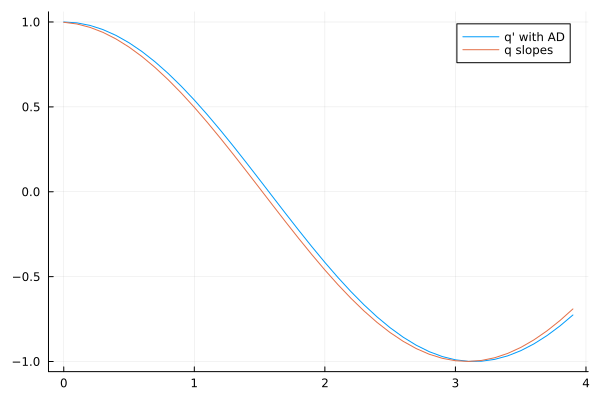

In [148]:
using Plots, ForwardDiff

# operator to get the derivative of this function using auto-differentiation
D(f) = x -> ForwardDiff.derivative(f,x)

# compare slopes with auto-differentiation for sin(x)
q(x) = sin(x)
x = 0.0:0.1:4.0
q_x = q.(x)
q_slopes_x = slopes(q_x, x)
D_q_x = D(q).(x)    # broadcasts auto-differentiation across vector

plot(x[1:(end-1)], D_q_x[1:(end-1)], label = "q' with AD")
plot!(x[1:(end-1)], q_slopes_x, label = "q slopes")

Passing a function instead of an array

In [153]:
slopes(f::Function, x::AbstractRange) = diff(f.(x)) / step(x)    # broadcast function

@show typeof(q) <: Function
@show typeof(x) <: AbstractRange
q_slopes_x = slopes(q, x)    # use slopes(f::Function, x)
@show q_slopes_x[1];

typeof(q) <: Function = true
typeof(x) <: AbstractRange = true
q_slopes_x[1] = 0.9983341664682815


What about if `x` was an `AbstractArray` and not an `AbstractRange`

In [155]:
# broadcasts over the diff
slopes(f::Function, x::AbstractArray) = diff(f.(x)) ./ diff(x)

x_array = Array(x)    # convert range to array
@show typeof(x_array) <: AbstractArray
q_slopes_x = slopes(q, x_array)
@show q_slopes_x[1];

typeof(x_array) <: AbstractArray = true
q_slopes_x[1] = 0.9983341664682815


## Exercise 2 from Lesson 5

1. Recursive average filter

In [17]:
function f(k::Int64)
    Y = zeros(k)
    μ = zeros(k)
    α = 10
    for i in 1:k
        Y[i] = α + 4*rand()
        μ[i] = sum(Y[1:i])/i
    end
    return μ
end

function f2(k::Int64)
    Y = zeros(k)
    μ = zeros(k)
    α = 10
    for i in 1:k
        Y[i] = α + 4*rand()
        if i == 1
            μ[i] = Y[i]
        else
            μ[i] = (i-1)/i * μ[i-1] + 1/i * Y[i]
        end
    end
    return μ
end

f2 (generic function with 1 method)

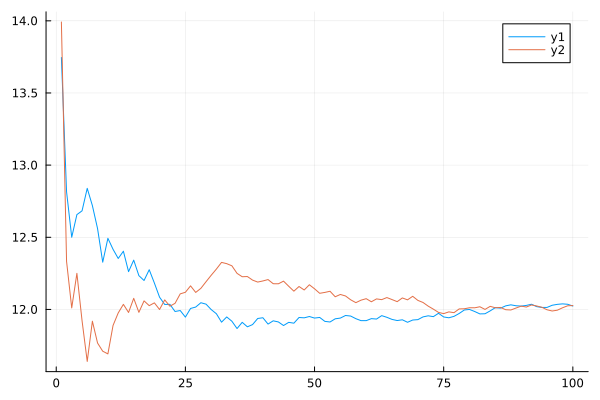

In [26]:
using Plots
plot(f(100))
plot!(f2(100))

2. Moving average filter

In [2]:
function f1(k::Int64)
    α = 2
    Y = zeros(k)
    ϵ = 6*rand(k)
    
    for i in 1:k
        if i == 1
            Y[i] = α + ϵ[i]
        else
            Y[i] = Y[i-1] + ϵ[i]
        end
    end
    return Y
end

f1 (generic function with 1 method)

In [3]:
function f2(n::Int64, k::Int64)
    Y = f1(k)
    MA = zeros(k)
    
    for i in 1:k
        if i < n
            MA[i] = sum(Y[1:i])/i
        else
            MA[i] = sum(Y[(i-n+1):i])/n
        end
    end
    return (; val = Y, avg = MA)
end

f2 (generic function with 1 method)

In [4]:
result = f2(5,100);

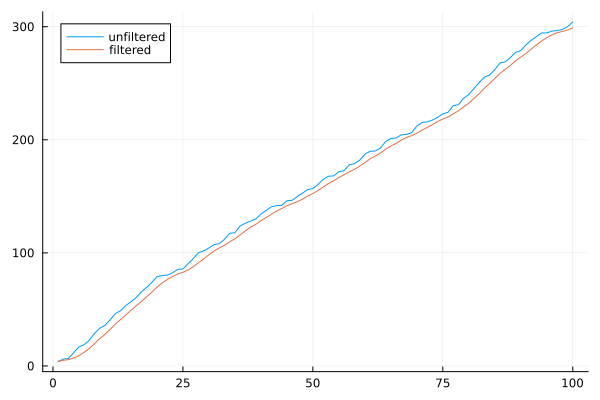

In [5]:
using Plots
plot(result[:1], label = "unfiltered")
plot!(result[:2], label = "filtered")

3. Low pass filter
   Very similar to the recurive average filter. We are going to see the first-order low-pass filter first.
   **Note:** Changing the $\alpha$ will make the line fit the data more or less tightly by putting more or less emphasis on the most recent data point.

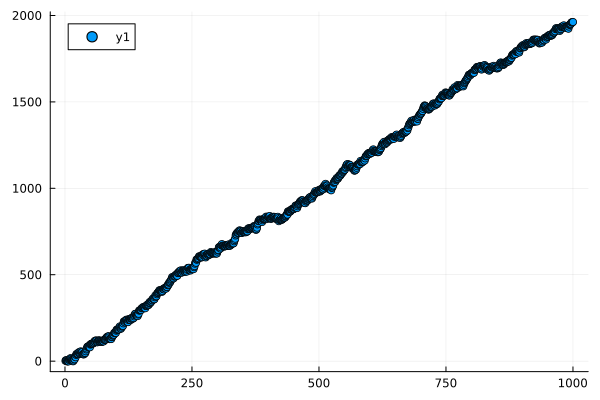

In [101]:
using Distributions, Plots

function f1(α::Float64, k::Int64)
    Y = zeros(k)
    dist = Normal(0.0,6.0)
    ϵ = rand(dist,k)
    drift = 2
    for t in 1:k
        if t == 1
            Y[t] = drift + ϵ[t]
        else
            Y[t] = Y[t-1] + drift + ϵ[t]
        end
    end
    return Y
end

Y = f(1.0, 1000)
scatter(Y)

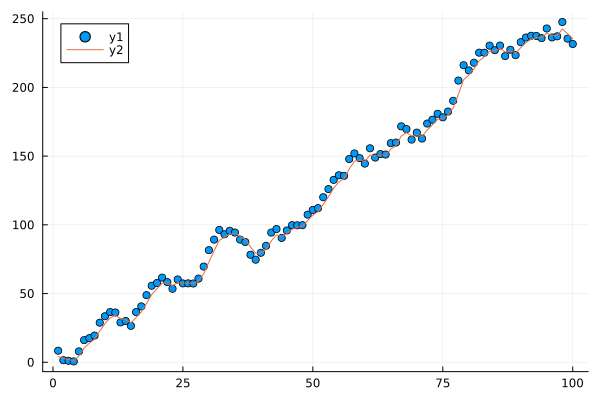

In [50]:
function f2(α::Float64, k::Int64)
    Y = f1(α,k)
    Y_bar = zeros(k)
    
    for t in 1:k
        if t == 1
            Y_bar[t] = (1 - α)*Y[t]
        else
            Y_bar[t] = α * Y_bar[t-1] + (1-α) * Y[t]
        end
    end
    return  (; val = Y, filter = Y_bar)
end
result = f2(0.5,100)
scatter(result[:1])
plot!(result[:2])

4. A Kalman Filter is basically a low pass filter where the alpha changes for each step

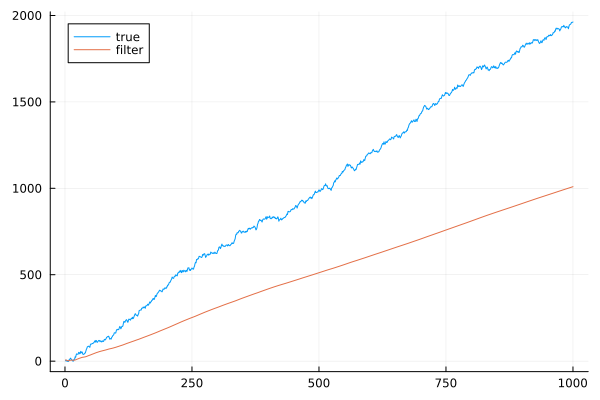

In [102]:
function f3(z, x, P)
    A = 1
    H = 1
    Q = 0
    R = 4

    # I. prediction step
    xp = A*x    # prediction of estimate
    Pp = A*P*A + Q    # prediction of the error covariance
    
    # II =. estimation step
    K = Pp*H'*inv(H*Pp*H' + R)    # kalman gain

    x = xp + K*(z - H*xp)    # computation of estimate
    P = Pp - K*H*Pp    # computation of error covariance

    return x,P
end

N = 1000
x = 14
P = 6

#val = randn(N)*4 .+ 14.4
val = Y
filter = zeros(N)

for i in 1:N
    x, P = f3(val[i], x, P)
    filter[i] = x
end

plot(val, label = "true")
plot!(filter, label = "filter")